--- Visualizing K-Means Clustering for Asset Grouping ---
Sample Asset Features (first 5):
   Annualized Return  Annualized Volatility Asset ID
0           0.114197               0.297815  Asset_1
1           0.124823               0.190724  Asset_2
2          -0.007563               0.099205  Asset_3
3           0.135625               0.194430  Asset_4
4           0.070760               0.323613  Asset_5


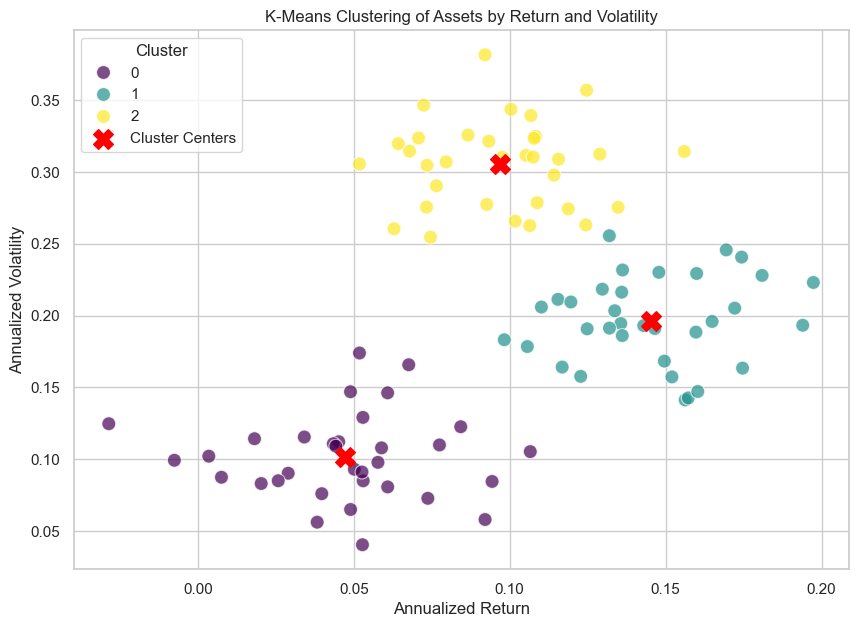


Interpretation:
Assets have been grouped into 3 clusters based on their return and volatility profiles.
For example, one cluster might represent high-return, high-volatility assets,
another low-return, low-volatility assets, and so on.
This can help in portfolio diversification or risk management.
--------------------------------------------------

--- Visualizing Linear Regression for a Simple Factor Model ---
Actual Alpha: 0.0010, Predicted Alpha: 0.0020
Actual Beta: 1.20, Predicted Beta: 1.26
R-squared: 0.8587


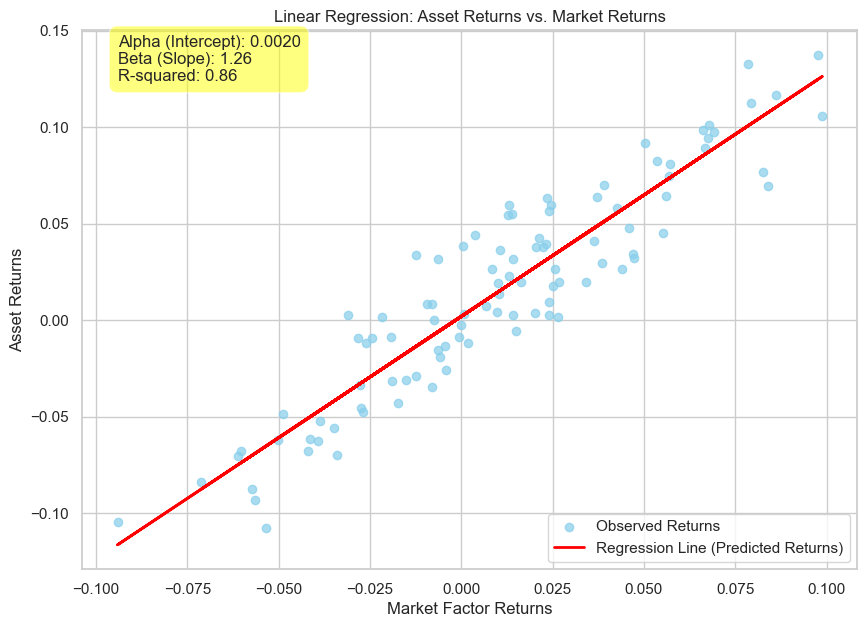


Interpretation:
The regression line shows the expected asset return given a certain market return.
The 'Beta' (1.26) indicates the asset's sensitivity to the market factor.
A beta > 1 means the asset is generally more volatile than the market.
The 'Alpha' can be interpreted as the excess return not explained by the market.
--------------------------------------------------

--- Visualizing PCA for Asset Feature Dimensionality Reduction ---
Sample Multi-Feature Asset Data (first 5 rows, 5 features):
        P/E        P/B  Div Yield       D/E  Sales Growth
0  6.964692   6.343739   2.268515  5.513148     12.766443
1  4.231065  11.923174   6.848297  4.809319      7.306027
2  3.431780   9.006387   4.385722  0.596779      6.725867
3  7.379954   5.514894   1.754518  5.315514     11.222239
4  6.344010  11.666323   7.244553  6.110235     12.299641

Explained variance by each component: [0.39449771 0.20476637]
Total variance explained by 2 components: 0.5993


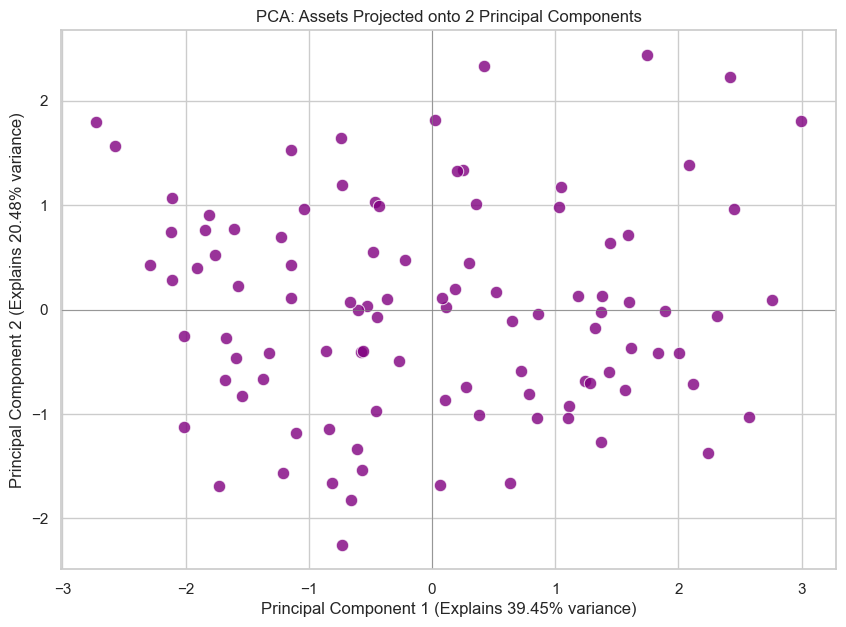

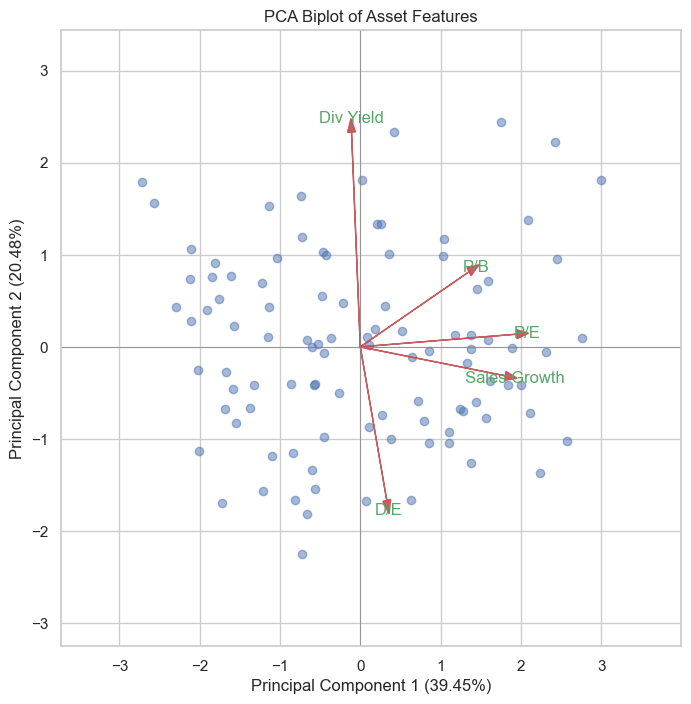


Interpretation:
PCA has reduced the 5-dimensional feature space to 2 dimensions.
These 2 components capture 59.93% of the total variance.
This can help visualize high-dimensional data, reduce noise, or create new 'meta-features' for other models.
The biplot shows how original features (e.g., P/E, Sales Growth) contribute to the principal components.
Features pointing in similar directions are positively correlated in the PC space.
--------------------------------------------------

All visualizations complete. These examples illustrate how ML concepts can be applied and visualized in quantitative finance.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs # For generating synthetic cluster data

# Set a nice theme for seaborn plots
sns.set_theme(style="whitegrid")

# --- 1. K-Means Clustering for Asset Grouping ---
def visualize_kmeans_assets():
    """
    Generates synthetic asset data (e.g., based on return and volatility)
    and applies K-Means clustering to group them.
    """
    print("--- Visualizing K-Means Clustering for Asset Grouping ---")

    # Generate synthetic asset data
    # Let's assume we have 100 assets and 3 distinct groups
    # Features: Annualized Return, Annualized Volatility
    np.random.seed(42) # for reproducibility
    # make_blobs is great for creating clearly separated clusters
    # We can imagine these centers represent different asset classes/risk profiles
    centers = [[0.15, 0.20], [0.05, 0.10], [0.10, 0.30]] # (High Return/High Vol, Low/Low, Med/Very High)
    X_assets, _ = make_blobs(n_samples=100, centers=centers, cluster_std=0.03, random_state=42)

    asset_features = pd.DataFrame(X_assets, columns=['Annualized Return', 'Annualized Volatility'])
    asset_features['Asset ID'] = [f'Asset_{i+1}' for i in range(len(X_assets))]

    print("Sample Asset Features (first 5):")
    print(asset_features.head())

    # Apply K-Means
    n_clusters = 3 # We know we designed 3, but in real life this is often chosen via Elbow method or Silhouette score
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    asset_features['Cluster'] = kmeans.fit_predict(X_assets)
    cluster_centers = kmeans.cluster_centers_

    # Visualization
    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        data=asset_features,
        x='Annualized Return',
        y='Annualized Volatility',
        hue='Cluster',
        palette='viridis', # Using a distinct color palette
        s=100, # size of points
        alpha=0.7
    )
    plt.scatter(
        cluster_centers[:, 0], cluster_centers[:, 1],
        marker='X', s=200, color='red', label='Cluster Centers'
    )
    plt.title('K-Means Clustering of Assets by Return and Volatility')
    plt.xlabel('Annualized Return')
    plt.ylabel('Annualized Volatility')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

    print("\nInterpretation:")
    print(f"Assets have been grouped into {n_clusters} clusters based on their return and volatility profiles.")
    print("For example, one cluster might represent high-return, high-volatility assets,")
    print("another low-return, low-volatility assets, and so on.")
    print("This can help in portfolio diversification or risk management.")
    print("-" * 50)

# --- 2. Linear Regression for Simple Factor Model ---
def visualize_linear_regression_factor_model():
    """
    Generates synthetic data for an asset's return based on a market factor (e.g., S&P 500 return)
    and applies Linear Regression to model this relationship (like a simplified CAPM).
    """
    print("\n--- Visualizing Linear Regression for a Simple Factor Model ---")

    np.random.seed(0) # for reproducibility
    num_observations = 100

    # Market Factor Returns (e.g., S&P 500 monthly returns)
    market_returns = np.random.normal(loc=0.008, scale=0.04, size=num_observations) # Avg 0.8% monthly, 4% std dev

    # Asset Returns (dependent on market returns + some noise)
    # Asset_Return = alpha + beta * Market_Return + epsilon
    alpha = 0.001  # Asset's specific excess return (intercept)
    beta = 1.2     # Asset's sensitivity to market (slope)
    epsilon_std = 0.02 # Idiosyncratic risk
    asset_returns = alpha + beta * market_returns + np.random.normal(loc=0, scale=epsilon_std, size=num_observations)

    # Reshape for scikit-learn (expects X to be 2D)
    X_market = market_returns.reshape(-1, 1)
    y_asset = asset_returns

    # Apply Linear Regression
    model = LinearRegression()
    model.fit(X_market, y_asset)

    # Get model parameters
    predicted_alpha = model.intercept_
    predicted_beta = model.coef_[0]
    predictions = model.predict(X_market)
    r_squared = model.score(X_market, y_asset)

    print(f"Actual Alpha: {alpha:.4f}, Predicted Alpha: {predicted_alpha:.4f}")
    print(f"Actual Beta: {beta:.2f}, Predicted Beta: {predicted_beta:.2f}")
    print(f"R-squared: {r_squared:.4f}")

    # Visualization
    plt.figure(figsize=(10, 7))
    plt.scatter(X_market, y_asset, color='skyblue', label='Observed Returns', alpha=0.7)
    plt.plot(X_market, predictions, color='red', linewidth=2, label='Regression Line (Predicted Returns)')
    plt.title('Linear Regression: Asset Returns vs. Market Returns')
    plt.xlabel('Market Factor Returns')
    plt.ylabel('Asset Returns')
    plt.legend()
    plt.grid(True)
    plt.text(min(market_returns), max(asset_returns)*0.9,
             f'Alpha (Intercept): {predicted_alpha:.4f}\nBeta (Slope): {predicted_beta:.2f}\nR-squared: {r_squared:.2f}',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
    plt.show()

    print("\nInterpretation:")
    print("The regression line shows the expected asset return given a certain market return.")
    print(f"The 'Beta' ({predicted_beta:.2f}) indicates the asset's sensitivity to the market factor.")
    print("A beta > 1 means the asset is generally more volatile than the market.")
    print("The 'Alpha' can be interpreted as the excess return not explained by the market.")
    print("-" * 50)

# --- 3. PCA for Asset Feature Dimensionality Reduction ---
def visualize_pca_asset_features():
    """
    Generates synthetic multi-feature asset data and applies PCA
    to reduce dimensionality for visualization or further analysis.
    """
    print("\n--- Visualizing PCA for Asset Feature Dimensionality Reduction ---")

    # Generate synthetic data for 100 assets with 5 features
    # e.g., P/E, P/B, Dividend Yield, Debt/Equity, Sales Growth
    np.random.seed(123)
    n_assets = 100
    n_features = 5
    X_multi_features = np.random.rand(n_assets, n_features) * 10 # Scale features for better visualization

    # To make it more interesting, let's introduce some correlation between features
    # (e.g., assets with high P/E might also have high Sales Growth)
    X_multi_features[:, 1] += X_multi_features[:, 0] * 0.5 # P/B somewhat correlated with P/E
    X_multi_features[:, 4] += X_multi_features[:, 0] * 0.8 # Sales Growth highly correlated with P/E

    feature_names = ['P/E', 'P/B', 'Div Yield', 'D/E', 'Sales Growth']
    asset_data_df = pd.DataFrame(X_multi_features, columns=feature_names)

    print("Sample Multi-Feature Asset Data (first 5 rows, 5 features):")
    print(asset_data_df.head())

    # Standardize features before PCA
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_multi_features)

    # Apply PCA
    n_components = 2 # Reduce to 2 dimensions for easy visualization
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    print(f"\nExplained variance by each component: {pca.explained_variance_ratio_}")
    print(f"Total variance explained by {n_components} components: {np.sum(pca.explained_variance_ratio_):.4f}")

    pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

    # Visualization
    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        data=pca_df,
        x='Principal Component 1',
        y='Principal Component 2',
        s=80,
        alpha=0.8,
        color='purple'
    )
    plt.title(f'PCA: Assets Projected onto {n_components} Principal Components')
    plt.xlabel(f'Principal Component 1 (Explains {pca.explained_variance_ratio_[0]:.2%} variance)')
    plt.ylabel(f'Principal Component 2 (Explains {pca.explained_variance_ratio_[1]:.2%} variance)')
    plt.grid(True)
    plt.axhline(0, color='grey', lw=0.5)
    plt.axvline(0, color='grey', lw=0.5)
    plt.show()

    # Optional: Biplot (shows how original features contribute to PCs)
    # This is a bit more advanced but very insightful
    plt.figure(figsize=(8, 8))
    # Plot transformed data points
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, label='Assets')
    # Plot loading vectors (original features in PC space)
    for i, feature in enumerate(feature_names):
        plt.arrow(0, 0, pca.components_[0, i]*3, pca.components_[1, i]*3, # Scale arrows for visibility
                  color='r', alpha=0.9, head_width=0.1)
        plt.text(pca.components_[0, i]*3.2, pca.components_[1, i]*3.2, # Adjust text position
                 feature, color='g', ha='center', va='center')
    plt.xlim(min(X_pca[:,0])-1, max(X_pca[:,0])+1)
    plt.ylim(min(X_pca[:,1])-1, max(X_pca[:,1])+1)
    plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%})')
    plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%})')
    plt.title('PCA Biplot of Asset Features')
    plt.grid(True)
    plt.axhline(0, color='grey', lw=0.5)
    plt.axvline(0, color='grey', lw=0.5)
    plt.show()


    print("\nInterpretation:")
    print(f"PCA has reduced the {n_features}-dimensional feature space to {n_components} dimensions.")
    print(f"These {n_components} components capture {np.sum(pca.explained_variance_ratio_)*100:.2f}% of the total variance.")
    print("This can help visualize high-dimensional data, reduce noise, or create new 'meta-features' for other models.")
    print("The biplot shows how original features (e.g., P/E, Sales Growth) contribute to the principal components.")
    print("Features pointing in similar directions are positively correlated in the PC space.")
    print("-" * 50)

# --- Main execution ---
if __name__ == "__main__":
    # 1. K-Means Clustering
    visualize_kmeans_assets()

    # 2. Linear Regression
    visualize_linear_regression_factor_model()

    # 3. PCA
    visualize_pca_asset_features()

    print("\nAll visualizations complete. These examples illustrate how ML concepts can be applied and visualized in quantitative finance.")